<a href="https://colab.research.google.com/github/eliascruzdba/Enem_2019/blob/main/03_Modelagem_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas 


In [ ]:
# importar bibliotecas básicas para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import warnings
warnings.filterwarnings('ignore')

importar base separada em Treinamento e Teste através do pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/Dataframe/base_enem_corr.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    X_train, X_test, y_train, y_test = pickle.load(f)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44342, 4)
(44342,)
(11086, 4)
(11086,)


# Modelagem

Na Regressão Linear nosso objetivo é fazer a previsão de números. Modelagem da relação entre variáveis numéricas (variável dependente X, variável esplanatória y). 

O primeiro modelo que usaremos é o de "Linear Suport Vector Machine" (LinearSVR), que é basicamente uma previsão dos dados através de uma função linear.


Referência LinearSVM
        https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [ ]:
from sklearn.svm import LinearSVR
seed = 4321
modelo = LinearSVR(random_state=seed)
modelo.fit(X_train, y_train)

LinearSVR(random_state=4321)

Previsão dos dados separados para teste.

In [ ]:
y_prev = modelo.predict(X_test)

In [ ]:
type(y_prev)

numpy.ndarray

In [ ]:
y_prev

array([607.6429684 , 611.5803646 , 655.13515877, ..., 533.05942377,
       508.11794165, 593.83183105])

Com os resultados de previsão disponível, podemos fazer uma comparação destes com os dados reais.

Text(0.5, 1.0, 'Real X Previsto')

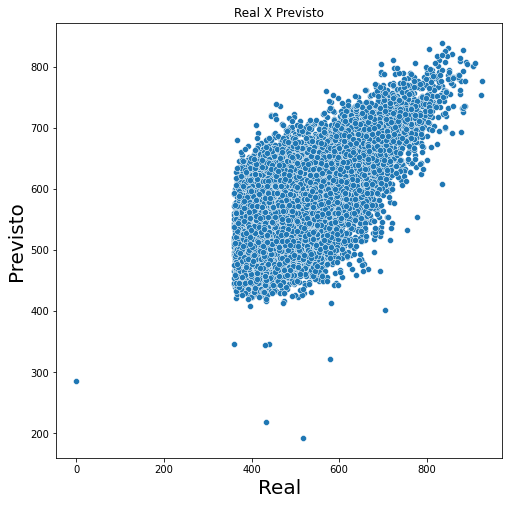

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(y_test, y_prev)
plt.xlabel('Real', fontsize=20)
plt.ylabel('Previsto', fontsize=20)
plt.title('Real X Previsto')

Erro de previsão do modelo.

Text(0.5, 1.0, 'Real X erro de Previsao')

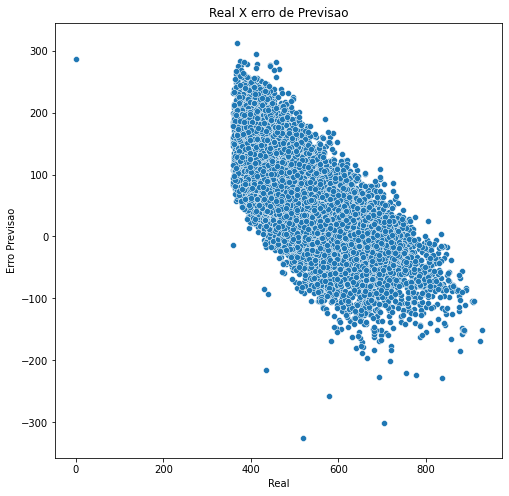

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(y_test, (y_prev-y_test))
plt.xlabel('Real')
plt.ylabel('Erro Previsao')
plt.title('Real X erro de Previsao')

Se fizermos um "modelo simplificado" comparando a média e mediana dos dados de entrada do modelo e comparar com o resultado previsto, temos:

Text(0.5, 1.0, 'Real X Previsto')

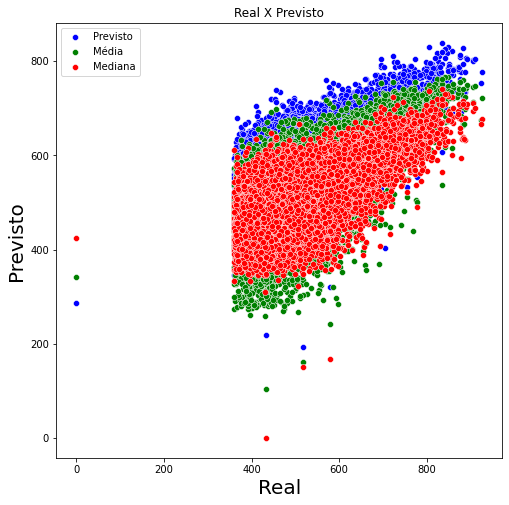

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(y_test, y_prev, color='blue', label='Previsto')
#média das entradas x previsto
sns.scatterplot(y_test, X_test.mean(axis=1), color='green', label='Média')
sns.scatterplot(y_test, X_test.median(axis=1), color='red', label='Mediana')

plt.xlabel('Real', fontsize=20)
plt.ylabel('Previsto', fontsize=20)
plt.title('Real X Previsto')

Visualizando diferenças dos modelos através da Média, Mediana e Previsto:

Text(0.5, 1.0, 'Real X Previsto')

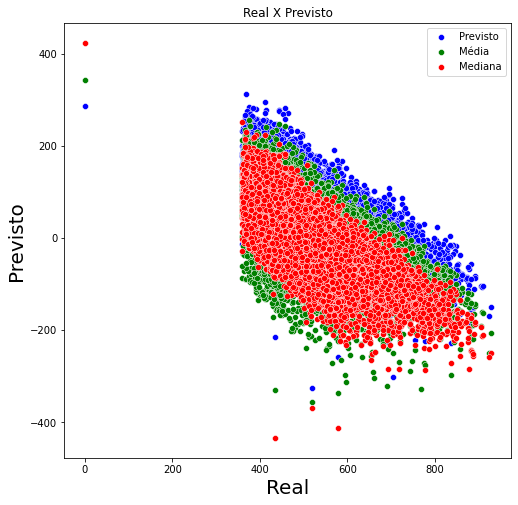

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(y_test, y_prev-y_test, color='blue', label='Previsto')

sns.scatterplot(y_test, X_test.mean(axis=1)-y_test, color='green', label='Média')
sns.scatterplot(y_test, X_test.median(axis=1)-y_test, color='red', label='Mediana')

plt.xlabel('Real', fontsize=20)
plt.ylabel('Previsto', fontsize=20)
plt.title('Real X Previsto')

As notas previstas no modelo acabam favorecendo as pessoas que tiraram notas menores e penalizando os candidatos de maior performance.


Uma das formas de ver a qualidade do modelo é através da média dos quadrados da diferença:

In [ ]:
resultados = pd.DataFrame()
resultados['Real'] = y_test
resultados['Previsto'] = y_prev
resultados['Diferenca'] = y_test-y_prev
resultados['Diferenca_Quadrada'] = (y_test-y_prev)**2
resultados['Diferenca_Quadrada'].mean()

9618.331677997987

In [ ]:
#medir a qualidade do modelo
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_prev)

9618.33167799797

Realizando a comparação com outros modelos para saber se o nosso modelo é bom. Vamos realizar o valor da qualidade através da diferença quadrática de erros (MSE).

O scikit-learn possui outros modelos de regressão. Vamos comparar alguns:

# Comparação de modelos 

DummyRegressor

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html?highlight=dummyregressor#sklearn.dummy.DummyRegressor

In [ ]:
#comparar com modelo Dummy
from sklearn.dummy import DummyRegressor
import numpy as np
modelo_dummy = DummyRegressor
#Treino do Modelo
X = X_train
y = y_train

dummy_regr = DummyRegressor(strategy="mean")
modelo_dummy = dummy_regr.fit(X, y)
modelo_dummy_prev = modelo_dummy.predict(X_test)
mean_squared_error(y_test, modelo_dummy_prev)
#dummy_regr.predict(X)


11839.179568445132

LinearRegression

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

modelo_LinearRegression = LinearRegression()

#Treino
modelo_LinearRegression.fit(X_train, y_train)
modelo_LinearRegression_prev = modelo_LinearRegression.predict(X_test)
mean_squared_error(y_test, modelo_dummy_prev)

11839.179568445132

SVM

Referência: https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm

In [ ]:
from sklearn.svm import SVR
modelo_SVR = SVR()

modelo_SVR.fit(X_train, y_train)
modelo_SVR_prev = modelo_SVR.predict(X_test)
mean_squared_error(y_test, modelo_SVR_prev)

5426.078054896129

#Calcular o MAE de cada um dos modelos:

Erro Absoluto Médio (MAE): O Erro Absoluto Médio consiste na média das distâncias entre valores preditos e reais.</br>
</br>

LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
MAE_LinearRegression = mae(y_test, y_prev)
MAE_LinearRegression

80.0707733402368

modelo_dummy_prev

In [ ]:
MAE_LinearRegression = mae(y_test, modelo_dummy_prev)
MAE_LinearRegression

90.01282369590935

modelo_SVR_prev

In [ ]:
MAE_LinearRegression = mae(y_test, modelo_SVR_prev)
MAE_LinearRegression

58.28108353807321

Aplicando outros modelos...

# Arvore de Decisão

https://scikit-learn.org/stable/modules/tree.html


In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=3)
#treino
modelo_DecisionTreeRegressor.fit(X_train, y_train)
#result
y_DecisionTreeRegressor = modelo_DecisionTreeRegressor.predict(X_test)
print(mae(y_test, y_DecisionTreeRegressor))


62.78241041966246


In [ ]:
#Divisão entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)


modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=3)
#treino
modelo_DecisionTreeRegressor.fit(X_train, y_train)
#result
y_DecisionTreeRegressor = modelo_DecisionTreeRegressor.predict(X_test)
print(mae(y_test, y_DecisionTreeRegressor))

63.25632540982931


# CrossValidation

O Cross_validade retorna um dictionary contendo 3 parâmetros:</br>


1.   fit_time: tempo de treino e teste dos dados para cada divisão.
2.   score_time: tempo para calcular o score de cada divisão.
3.   test_score: a medida de qualidade do modelo para cada divisão.


Importando base_enem_corr do notebook anterior...

In [ ]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']

df_MDTree = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataframe/base_enem_corr.csv', usecols=colunas_notas)

notas_entrada = X = df_MDTree[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]
notas_entrada = y = df_MDTree['NU_NOTA_MT']

In [ ]:
from sklearn.model_selection import cross_validate

modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
cross_validate(modelo_DecisionTreeRegressor, X, y)

{'fit_time': array([0.05232692, 0.09915733, 0.04631495, 0.05282879, 0.04871225]),
 'score_time': array([0.00780416, 0.00341582, 0.00298333, 0.00323462, 0.00454307]),
 'test_score': array([0.43107958, 0.44642188, 0.45567168, 0.44797982, 0.36344703])}

# Considerações Finais

Dentre os modelos destacamos...
</br>
</br>
Dentre as Medidas de cálculo escolhidas utilizo o MAE por representar uma métrica sólida para modelos que devem prever muitos dados ou dados sazonais, como em previsões de números de casos de doenças, nas quais prever a tendência e sazonalidade dos números é mais importante do que os valores absolutos de cada dia.</br>
</br>
Este estudo apresenta um grande potencial de previsões levando em consideração os diversos insights retirados do dataframe que servem de apoio para a construção de novos estudos com o aprofundamento de novos algorítmos de Machine Learning.



